
# Convolutional Neural Network

**Due: Wednesday, 12/13/2023, 2:15 PM**

Welcome to your fifth (last) assignment. You will train a convolutional neural network to classify images in this assignment. 

## Exercises:
1. $\color{violet}{\textbf{(10\%) Data Loading}}$
2. $\color{violet}{\textbf{(30\%) ConvNet Creation}}$
3. $\color{violet}{\textbf{(20\%) Loss Function and Optimizer}}$
4. $\color{violet}{\textbf{(30\%) Training}}$
5. $\color{violet}{\textbf{(10\%) Evaluation}}$

## Instructions:
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- This assignment was originated from one of the [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). 

**You will learn:**

how to use PyTorch on
1. Loading built-in datasets and creating dataloaders 
2. Defining a Convolutional Neural Network
3. Defining a loss functions and an optimizer
4. Training a model.


## 1. Load Data
For this assignment, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


### $\color{violet}{\textbf{(10\%) Exercise 1: Data Loading}}$
1. Use `torchvision.datasets` to load CIFAR10 dataset into `train_set` and `test_set`.
2. Use `torch.utils.data.DataLoader` to create dataloaders for training data: `dataloader_train` and test data: `dataloader_test`.
3. Remeber to apply transforms on `train_set` and `test_set`

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
dataset categories: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


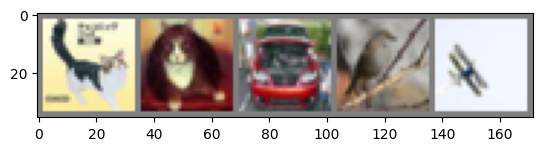

cat   cat   automobile bird  airplane


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # transform PILImage images of range [0, 255] to Tensors of normalized range [0, 1].
batch_size = 64

### START CODE HERE ### (≈ 4 lines of code)
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader_train = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader_test = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)
### END CODE HERE ### 

# Sanity check
classes = train_set.classes
print(f"dataset categories: {classes}")
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
data_iterator = iter(dataloader_train)  # get a batch of random training data
images, labels = next(data_iterator)
imshow(torchvision.utils.make_grid(images[:5]))  # display 5 samples
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))  # print classes of corresponding images


<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>



## 2. Create a Convolutional Neural Network

### $\color{violet}{\textbf{(30\%) Exercise 2: ConvNet Creation}}$
1. Use two convolutional kernels.
2. 1st convolutional kernel size should be (5, 5) and outputs 64 channels of features matrices.
3. 2nd convolutional kernel size should be (3, 3) and outputs 128 channels of features matrices.



In [6]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
### START CODE HERE ### (≈ 2 lines of code)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=(5,5))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=(3,3))
### END CODE HERE ### 
        self.fc1 = nn.Linear(128 * 6 * 6, 128)  # 128 channels * 5 horizontal features * 5 vertical features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 14
        x = self.pool(F.relu(self.conv2(x)))  # 6
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = ConvNet().to(device)  # use GPU if available

cpu


## 3. Cross Entropy Loss and Optimizer
Let's prepare a Classification Cross-Entropy loss function and a stochstic gradient descent (SGD) optimizer.

### $\color{violet}{\textbf{(20\%) Exercise 3: Loss Function and Optimizer}}$
1. Use the right loss function class from `torch.nn`.
2. Use the right optimizer class from `torch.optim`.

In [11]:
import torch.optim as optim

### START CODE HERE ### (≈ 2 lines of code)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.07)
### END CODE HERE ###


## 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

### $\color{violet}{\textbf{(30\%) Exercise 4: Training}}$


In [12]:
for epoch in range(10):  # loop over the dataset multiple times

    loss_train = 0.0
    for i, data in enumerate(dataloader_train, 0):
        feature_train, target_train = data[0].to(device), data[1].to(device)  # get the inputs; data is a list of [inputs, labels]
        optimizer.zero_grad()
### START CODE HERE ### (≈ 4 lines of code)
        pred_train = model(feature_train)
        loss = loss_fn(pred_train, target_train)
        loss.backward()  # back-propagation
        optimizer.step()  # update params
### END CODE HERE ###
        # print statistics
        loss_train += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] training loss: {loss_train / 200:.3f}')
            loss_train = 0.0

print('Finished Training')

[1,   200] training loss: 1.520
[1,   400] training loss: 1.410
[1,   600] training loss: 1.329
[2,   200] training loss: 1.167
[2,   400] training loss: 1.120
[2,   600] training loss: 1.075
[3,   200] training loss: 0.949
[3,   400] training loss: 0.938
[3,   600] training loss: 0.908
[4,   200] training loss: 0.818
[4,   400] training loss: 0.797
[4,   600] training loss: 0.781
[5,   200] training loss: 0.669
[5,   400] training loss: 0.676
[5,   600] training loss: 0.663
[6,   200] training loss: 0.553
[6,   400] training loss: 0.550
[6,   600] training loss: 0.573
[7,   200] training loss: 0.416
[7,   400] training loss: 0.464
[7,   600] training loss: 0.480
[8,   200] training loss: 0.341
[8,   400] training loss: 0.363
[8,   600] training loss: 0.367
[9,   200] training loss: 0.247
[9,   400] training loss: 0.274
[9,   600] training loss: 0.293
[10,   200] training loss: 0.175
[10,   400] training loss: 0.221
[10,   600] training loss: 0.228
Finished Training


## 5. Evaluate the Convolutional Neural Network Model

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



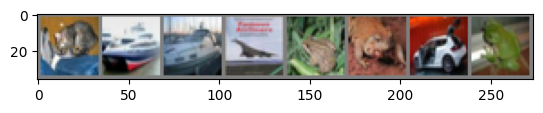

GroundTruth:  cat   ship  ship  airplane frog  frog  automobile frog 
Predicted:  cat   automobile airplane airplane deer  frog  automobile frog 


In [13]:
dataiter = iter(dataloader_test)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:8]))
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.

### $\color{violet}{\textbf{(10\%) Exercise 5: Evaluation}}$


In [14]:
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():  # zero the parameter gradients
    for data in dataloader_test:
        images, labels = data[0].to(device), data[1].to(device)
### START CODE HERE ### (≈ 2 lines of code)
        outputs = model(images) # predict images classes
        _, predicted = torch.max(outputs, 1)  # the class with the highest energy is what we choose as prediction
### END CODE HERE ###
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():  # again no gradients needed
    for data in dataloader_test:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 68 %
Accuracy for class: airplane is 92.2 %
Accuracy for class: automobile is 81.3 %
Accuracy for class: bird  is 53.6 %
Accuracy for class: cat   is 55.2 %
Accuracy for class: deer  is 64.9 %
Accuracy for class: dog   is 60.5 %
Accuracy for class: frog  is 74.3 %
Accuracy for class: horse is 73.9 %
Accuracy for class: ship  is 63.9 %
Accuracy for class: truck is 66.0 %


# Congrats on finishing this assignment!